# Molecular Dynamics Simulations


You may have seen in introductory chemistry or physics classes that the ideal gas
law can be derived from first principles when the interactions of the molecules with
each other are ignored, and only reflections off the walls of the surrounding box
are considered. We extend that model so that we can solve for the motion of every
molecule in a box interacting with every other molecule in the box (but not with the
walls). While our example is a simple one, molecular dynamics is of key importance
in many fields, including material science and biology.

### Simulation of Dynamics of Particles


There are many methods for solving ODEs. The second order ODE is transformed to the system of two first order ODEs as follows:

$$\frac{dr(t)}{dt} = v(t)$$

$$m\frac{dv(t)}{dt} = F(t)$$


We use a finite difference approximation that comes to a simple forward Euler Algorithm:

$$r_{n+1} = r_n + v_ndt$$

$$v_{n+1} = v_n + \frac{F_n}{m} dt$$


Here we discretize time t with time step






In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(8,8))

## Adjust axes limits according to your problem. Here we don't need more than a couple of meters left or right, and 600 meters up
ax.set(xlim=(-2, 2), ylim=(0, 600), xlabel='Position, meters', ylabel='Height, meters', title='Apple falling from CN tower')

# parameters of the problem
T = 10. #s
m = 0.3 #kg
g = 9.8 #m/s^2
v0x = -0.1 #m/s
H = 553. #m

# setting a timestep to be 50 ms
dt = 0.05 #s
N = int(T / dt)

# Allocating arrays for 2D problem
v = np.zeros((N+1, 2))
r = np.zeros((N+1, 2))
f = np.zeros((N+1, 2))

# initial conditions:
r[0] = np.array([0., H])
v[0] = np.array([-v0x, 0.])

# the only force is gravity
f[:] = np.array([0., -m * g])

## Run dynamics:
for n in range(N):
    v[n+1] = v[n] + f[n]/m * dt
    r[n+1] = r[n] + v[n+1] * dt

## drawing the first data point  
scat = ax.scatter(r[0,0], r[0,1], marker='o', c='g', s=200)

##   r[n,0]  ~~  x[n]
##   r[n,1]  ~~  y[n]


## animating 
def animate(i):
    scat.set_offsets(r[i])

ani = animation.FuncAnimation(fig, func=animate, frames=N)
## this function will create a lot of *.png files in a folder 'CNtower_frames'
## and create an HTML page with a simulation
ani.save('CNtower.html', writer=animation.HTMLWriter(fps= 1//dt))
plt.close()
#ani.save('CNtower.mp4', fps= 1//dt)

In [2]:
from IPython.display import HTML
HTML('CNtower.html')

When a closed system of particles are interacting through pairwise potentials, the force on each particle i  depends on its position with respect to every other particle j

$$m_i\frac{d^2r_i(t)}{dt^2} = \sum_jF_{ij}(t) = -\sum_j\nabla_i{U(|r_{ij}(t)|)}$$




### Simulation of 4-body problem with Hooke’s law

We want to know the dynamics of 3 particles 

The pairwise potential is (Hooke’s Law)  $U(r_{ij}) = \frac{K_s}{2}(r_{ij} - r_0)^2$


$$\mathbf{F_{ij}} = - \nabla_i{U(r_{ij})} = - K_s (r_{ij} - r_0) \nabla_i r_{ij} = - K_s (r_{ij} - r_0) \mathbf{r_{ij}} / r_{ij}$$

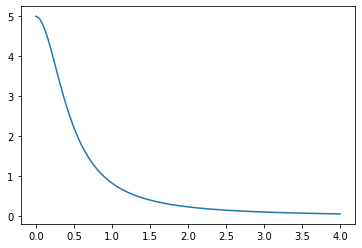

In [46]:
x=np.linspace(0, 4,100)
y=(1/((x)**2+0.2))


plt.plot(x,y)
plt.show()

In [3]:
# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5), ylabel='meters', xlabel='meters', title='4-Body problem')

# parameters of the problem
T = 100. #s
m = 10.0 #kg
ks = 0.4 #N/m
r0 = 1. #m

# setting a timestep to be 50 ms
dt = 0.05 #s
N = int(T / dt)

# Allocating arrays for 2D problem: first axis - time. second axis - particle's number. third - coordinate
v = np.zeros((N+1, 4, 2))
r = np.zeros((N+1, 4, 2))
f = np.zeros((N+1, 4, 2))

# initial conditions for 3 particles:
r[0,0] = np.array([0., 2.])
r[0,1] = np.array([2., 0.])
r[0,2] = np.array([-1., 1.0])
r[0,3] = np.array([-2., -2.])

def compute_forces(n):
    '''The function computes forces on each pearticle at time step n'''
    for i in range(4):
        for j in range(4):
            if i != j:
                rij = r[n,i] - r[n,j]
                rij_abs = np.linalg.norm(rij)
                f[n, i] -= ((-5/(rij_abs**2+0.001))+ks*(rij_abs - r0))* rij / rij_abs 
                
## Run dynamics:
for n in range(N):
    compute_forces(n)
    v[n+1] = v[n] + f[n]/m * dt
    r[n+1] = r[n] + v[n+1] * dt

## drawing and animating 
scat = ax.scatter(r[0,:,0], r[0,:,1], marker='o', c=['#fcba03', '#d703fc', '#0fbdab', '#746a8f'], s=2000)

def animate(i):
    scat.set_offsets(r[i])

ani = animation.FuncAnimation(fig, animate, frames=N)
plt.close()
## this function will create a lot of *.png files in a folder '4Body_frames'
ani.save('4body_4_repulsive.html', writer=animation.HTMLWriter(fps= 1//dt))

In [3]:
HTML('4body_4_repulsive.html')

##  First Model for many body MD

Add small randomness to system

?? ADD  functions to above example to calculate kinetic and potential enegy at each step
and plot energy behaviour




##  BASIC MD CONCEPTS




### Force Fields


<img  src="./forcefiled.png"   style="width:1000px">

### PERIODIC BOUNDARY CONDITION

Periodic boundary conditions (PBCs) are a set of boundary conditions which are often chosen for approximating a large (infinite) system by using a small part called a unit cell. PBCs are often used in computer simulations and mathematical models. The topology of two-dimensional PBC is equal to that of a world map of some video games; the geometry of the unit cell satisfies perfect two-dimensional tiling, and when an object passes through one side of the unit cell, it re-appears on the opposite side with the same velocity. In topological terms, the space made by two-dimensional PBCs can be thought of as being mapped onto a torus (compactification). The large systems approximated by PBCs consist of an infinite number of unit cells. In computer simulations, one of these is the original simulation box, and others are copies called images. During the simulation, only the properties of the original simulation box need to be recorded and propagated. The **minimum-image convention** is a common form of PBC particle bookkeeping in which each individual particle in the simulation interacts with the closest image of the remaining particles in the system.

### Basics of Crystallography

Find Madelung_constant  for NaCl

 

   $$ V_{i}={\frac {e}{4\pi \epsilon _{0}}}\sum _{{j\neq i}}{\frac {z_{j}}{r_{{ij}}}}$$



$$V_{i}={\frac {e}{4\pi \epsilon _{0}r_{0}}}\sum _{{j}}{\frac {z_{j}r_{0}}{r_{{ij}}}}={\frac {e}{4\pi \epsilon _{0}r_{0}}}M_{i}$$









### Standard molecular dynamics simulation algorithm

<img src="./Molecular_dynamics_algorithm.png"  style="width:600px" >

<IPython.core.display.Javascript object>


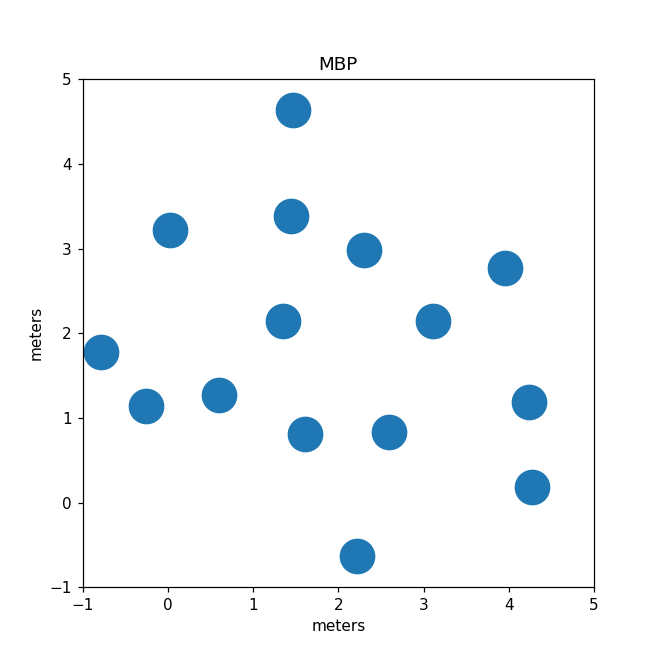

In [10]:
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation



# Setup the figure and axes...
fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlim=(-1, 5), ylim=(-1, 5), ylabel='meters', xlabel='meters', title='MBP')

# parameters of the problem
T = 10. #s
m = 1.0 #kg
ks = 0.4 #N/m
r0 = 1. #m

# setting a timestep to be 50 ms
dt = 0.05 #s
N = int(T / dt)

NP=16

#  change 4 to N
# Allocating arrays for 2D problem: first axis - time. second axis - particle's number. third - coordinate
v = np.zeros((N+1, NP, 2))
r = np.zeros((N+1, NP, 2))
f = np.zeros((N+1, NP, 2))

# initial conditions for 3 particles:
for k in range(NP):
    r[0,k] = 4*np.random.rand(2)

def compute_forces(n):
    '''The function computes forces on each pearticle at time step n'''
    for i in range(NP):
        for j in range(NP):
            if i != j:
                rij = r[n,i] - r[n,j]
                rij_abs = np.linalg.norm(rij)
                f[n, i] -= ((-5/(rij_abs**2+0.001))+ks*(rij_abs - r0))* rij / rij_abs 
                
## Run dynamics:
for n in range(N):
    compute_forces(n)
    v[n+1] = v[n] + f[n]/m * dt
    r[n+1] = r[n] + v[n+1] * dt

## drawing and animating 
scat = ax.scatter(r[0,:,0], r[0,:,1], marker='o',  s=500)


def animate(i):
    scat.set_offsets(r[i])

ani = animation.FuncAnimation(fig, animate, frames=N)

## this function will create a lot of *.png files in a folder '4Body_frames'
ani.save('new16.html', writer=animation.HTMLWriter(fps= 1//dt))